In [135]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/home/gabs/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Atividade 7

Seja uma PDF $ f(x) = \dfrac{3}{4} (1 - x²) $

In [114]:
def f(x):
    return (3 / 4) * (1 - x ** 2)

In [120]:
xmin = -1
xmax = 1
ymax = 0.75

In [54]:
N = 10000

In [155]:
i = 0
x = np.zeros(N)
test = 0
while i < N:
    # gera um possivel x com distribuicao uniforme entre xmim e mxmax
    x_cand = xmin + (xmax - xmin) * np.random.rand()
    # gera um valor de y para comparacao com a PDF no ponto x gerado
    y_test = ymax * np.random.rand()
    if y_test <= f(x_cand):
        x[i] = x_cand
        i += 1
    test += 1

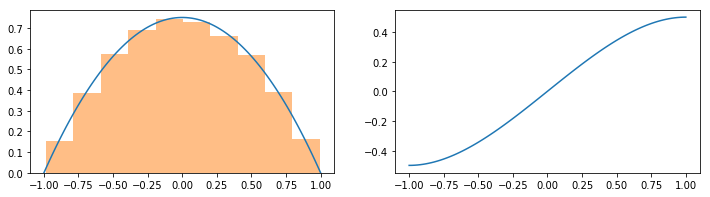

In [156]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2, nrows=1)

ax1.plot(x_, f(x_))
ax2.plot(x_, g(x_))
ax1.hist(x, alpha=.5, density=True);

In [157]:
xm = x.mean()

In [163]:
sigma_x = x.std() / np.sqrt(N)

In [164]:
s_xm = x.std()

In [165]:
xm

0.00466547892262544

In [166]:
s_xm

0.4501358967029096

In [167]:
sigma_x

0.004501358967029096

In [174]:
sum(abs(x - xm) < 2 * s_xm) / N

0.9816

---

Seja uma PDF $ h(y) = 0.5 \cos{y} $

In [176]:
def h(y):
    return 0.5 * np.cos(y)

In [189]:
ymin = - np.pi /2 
ymax = np.pi / 2
hmax = 0.5

In [190]:
N = 10000

In [191]:
i = 0
y = np.zeros(N)
test = 0
while i < N:
    # gera um possivel x com distribuicao uniforme entre xmim e mxmax
    y_cand = ymin + (ymax - ymin) * np.random.rand()
    # gera um valor de y para comparacao com a PDF no ponto x gerado
    h_test = hmax * np.random.rand()
    if h_test <= h(y_cand):
        y[i] = y_cand
        i += 1
    test += 1

In [192]:
y_ = np.linspace(ymin, ymax, 10000)

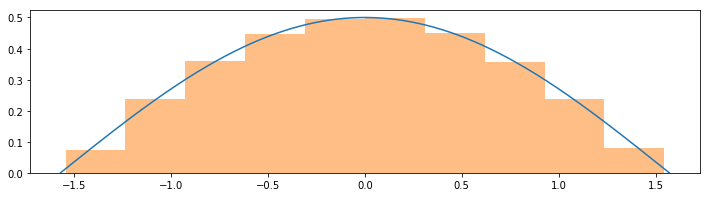

In [194]:
fig, ax1 = plt.subplots(figsize=(12, 3))

ax1.plot(y_, h(y_))
ax1.hist(y, alpha=.5, density=True);

In [196]:
ym = y.mean()

In [197]:
sigma_y = y.std() / np.sqrt(N)

In [198]:
s_ym = y.std()

In [199]:
ym

0.0001718007349379908

In [200]:
s_ym

0.6741440422758341

In [201]:
sigma_y

0.006741440422758341

In [202]:
sum(abs(y - ym) < 2 * s_ym) / N

0.9821

---

In [203]:
def metodo_inversao(N=1):
    """
    Gera um vetor de N elementos
    """
    
    # PDF do exemplo do roteiro: f(x) = 2 * x com x entre 0 e 1
    #  para a qual, g(x)=x^2, cuja inversa eh x(g)=sqrt(g)
    inv_g = lambda g : np.sqrt(g)
    
    # gera N valores de g com distribuicao uniforme entre 0 e 1
    g = np.random.rand(N)
    # calcula os valores de x correspondentes
    x = inv_g(g)
    
    return x

In [204]:
def metodo_exclusao(N=1):
    """
    Gera um vetor de N elementos
    """
    
    # PDF do exemplo do roteiro: f(x) = 2 * x com x entre 0 e 1
    xmin = 0
    xmax = 1
    ymax = 2
    f = lambda x : 2 * x
    
    i = 0
    x = np.zeros(N)
    while i < N:
        # gera um possivel x com distribuicao uniforme entre xmim e mxmax
        x_cand = xmin + (xmax - xmin) * np.random.rand()
        # gera um valor de y para comparacao com a PDF no ponto x gerado
        y_test = ymax * np.random.rand()
        if y_test <= f(x_cand):
            x[i] = x_cand
            i += 1
    
    return x